# **What is data preprocessing?**

Data preprocessing is a data mining technique that involves transforming raw data into an understandable format.


**Load the library to run the functions**





In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression
from sklearn.datasets import load_boston
from sklearn.datasets import load_iris
from scipy.stats import skew
from numpy import array 
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn import svm
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor 
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification
from scipy.stats import kurtosis
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import norm
dataset = pd.DataFrame()
import seaborn as sns
import warnings
from sklearn.decomposition import PCA
warnings.filterwarnings('ignore')
X = pd.DataFrame()
y = pd.DataFrame()
dataset_minmax_pca = pd.DataFrame()
dataset_minmax = pd.DataFrame()
dataset_minmax_corr = pd.DataFrame()

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Load the dataset**

In [ ]:
def loaddata(file):
    dataset =  pd.read_csv(file)
    dataset.head(5)
    dataset = pd.DataFrame(dataset).fillna(0)
#   dataset = pd.get_dummies(dataset,columns= ['attack_cat'])
    X=dataset.drop(columns=['label'], axis = 1)
    y=dataset['label']
    return dataset,X,y

## 1.**Correlation analysis**




*   Correlation can help in predicting one attribute from another (Great way to impute missing values).
*   List itemCorrelation can (sometimes) indicate the presence of a causal relationship.




**X (train) , y(label)**

**Remove the highly correlated features : to each other**

Advantage: Reduces noise 

[Reference](https://chrisalbon.com/machine_learning/feature_selection/drop_highly_correlated_features/)

### 1.1**Function to remove highly correlated data**

In [ ]:
def removeHcorrFeature(percentage,X):
  # Selecting all the features with high correlation values with other features
    corr_matrix = X.corr().abs()

  # Select upper triangle of correlation matrix
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

  # Find index of feature columns with correlation greater than 0.9
    o_drop = [column for column in upper.columns if any(upper[column] > percentage)]
    print(o_drop)
    return o_drop

# 2.**Feature Scaling**

## Conclusion -which scaler to use?

**The data is highly skewed, so it is desirable to normalize the data than to standardize.**

According to [ N. Sharma and N. S. Yadav, "Ensemble Learning based Classification of UNSW-NB15 dataset using Exploratory Data Analysis," 2021 9th International Conference on Reliability, Infocom Technologies and Optimization (Trends and Future Directions) (ICRITO), 2021, pp. 1-7, doi: 10.1109/ICRITO51393.2021.9596213.]

From plots below, we can see the dataset is highly skewed.

### 2.1 **MinMaxScaling**

About MinMax Scaler : 
* This Scaler responds well if the standard deviation is small and when a distribution is not Gaussian.     
* This Scaler is sensitive to outliers.

**Function for min max scaling**

In [ ]:
def applyMinMax(data):  
# scale features
    scaler = MinMaxScaler()
    model=scaler.fit(data)
    scaled_data=model.transform(data)
    return scaled_data
  #print(data_set)
  

### 2.2 **Standard Scaling**

About Standard Scaler: 
* Centering and scaling happen independently on each feature by computing the relevant statistics on the samples in the training set. 
* This scaler responds well when a distribution is Gaussian.

**Function for standard scaler** **bold text**

In [ ]:
def applyStandardScaler(data):
    scaler = StandardScaler()
    model = scaler.fit(data)
    scaled_data = model.transform(data)
  #print(data_set)
    return scaled_data

# 4.**Principle component Analysis**

**Why do we need standardization in the before applying PCA?**

More specifically, the reason why it is critical to perform standardization prior to PCA, is that the latter is quite sensitive regarding the variances of the initial variables. That is, if there are large differences between the ranges of initial variables, those variables with larger ranges will dominate over those with small ranges (For example, a variable that ranges between 0 and 100 will dominate over a variable that ranges between 0 and 1), which will lead to biased results. So, transforming the data to comparable scales can prevent this problem.

Points to note:

1) Scaling is critical while performing Principal Component Analysis(PCA). PCA tries to get the features with maximum variance, and the variance is high for high magnitude features and skews the PCA towards high magnitude features. [Reference](https://towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35)     

### 4.1**Functions for applying PCA method**

In [ ]:
def applyPCA(X, n_com):
   #print(data_set)
    pca = PCA(n_components=n_com).fit(X)
    X_train_pca = pca.transform(X)
    print(pca.n_components_)
    return X_train_pca

# Main functions

In [ ]:
def without_preprocess(filename):
    dataset,X,y=loaddata(filename)
    return X,y,dataset    
    #check if the dataset is gaussian

In [ ]:
X,y,dataset=without_preprocess("./input/cleaned_dataset_label_encoding.csv")

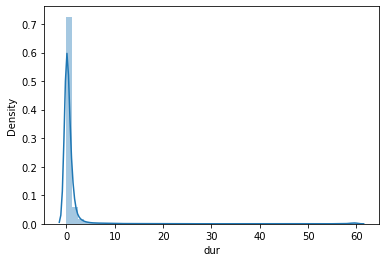

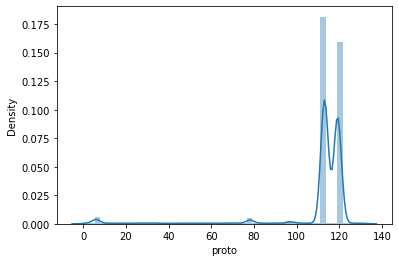

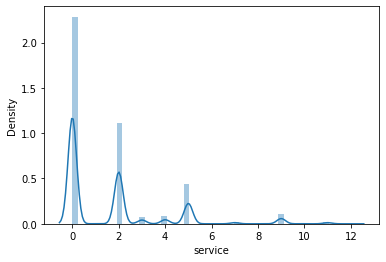

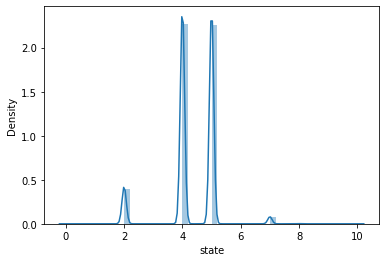

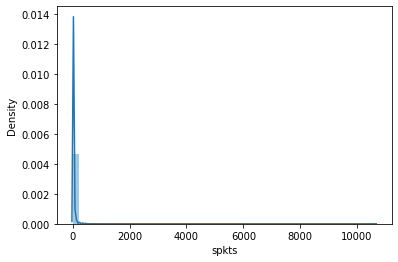

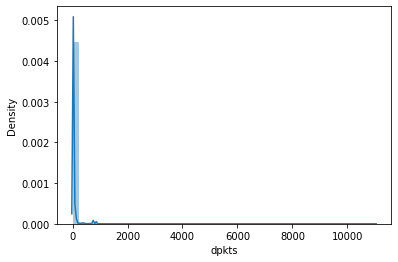

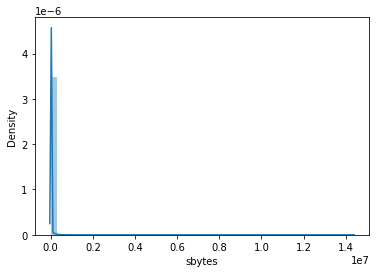

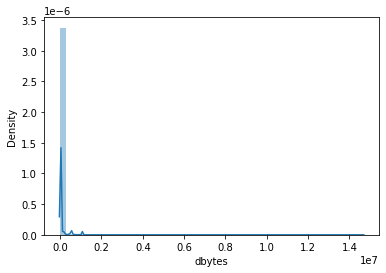

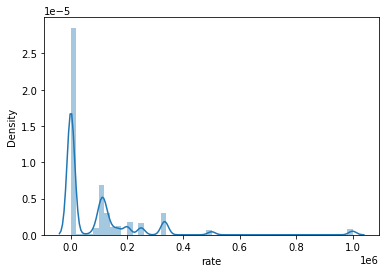

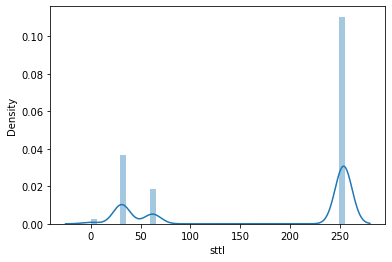

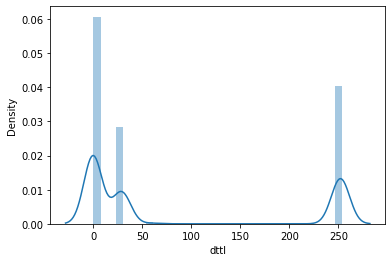

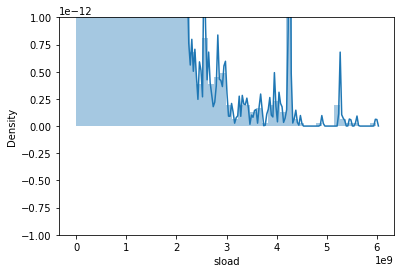

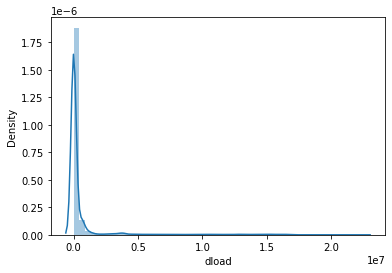

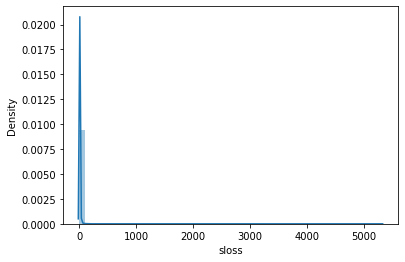

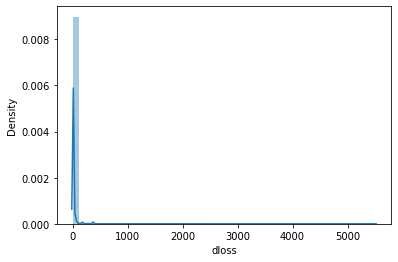

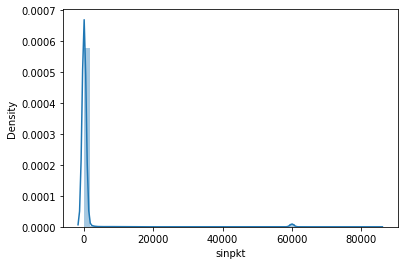

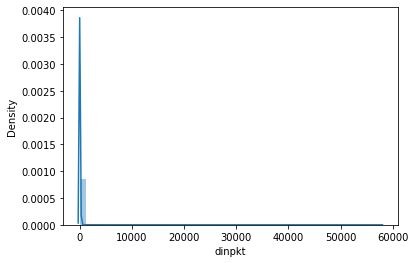

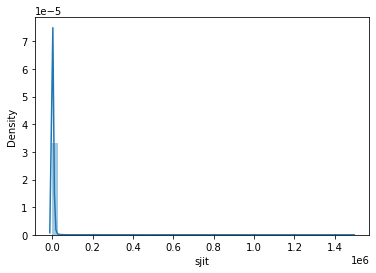

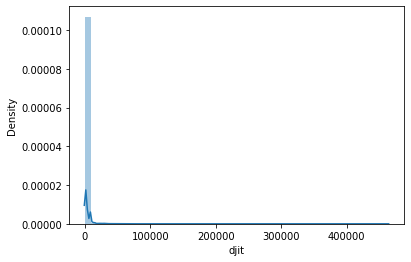

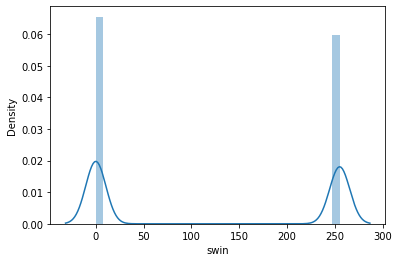

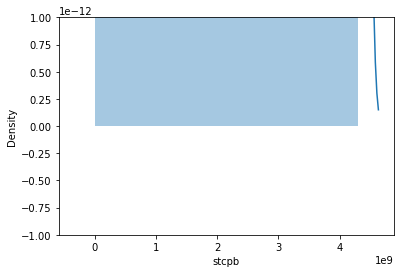

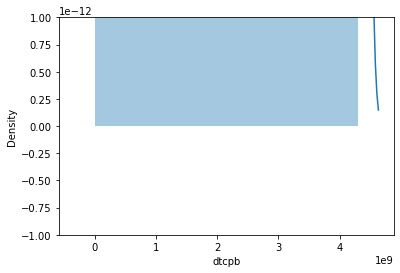

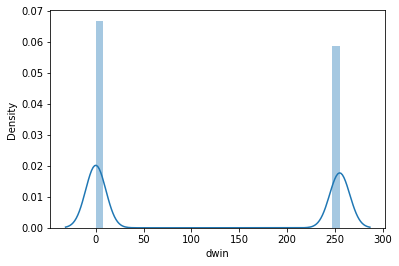

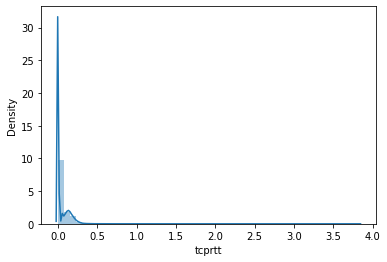

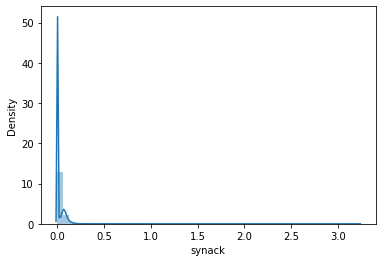

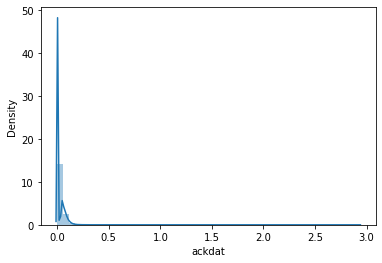

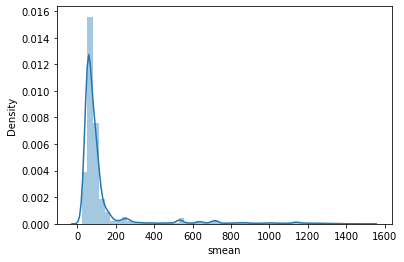

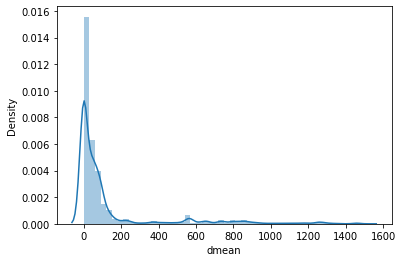

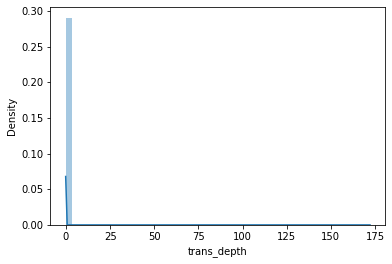

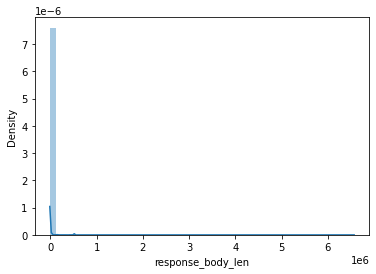

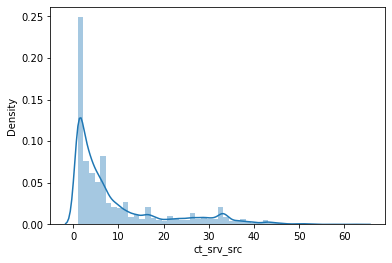

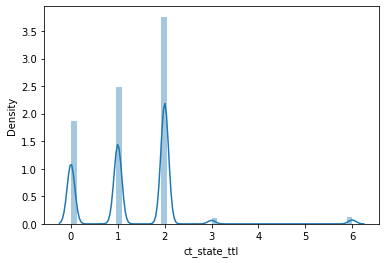

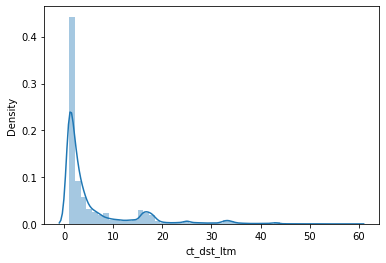

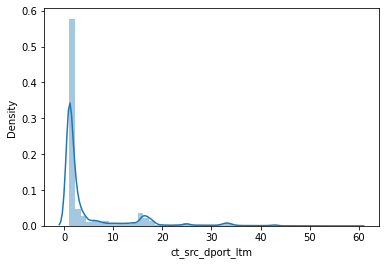

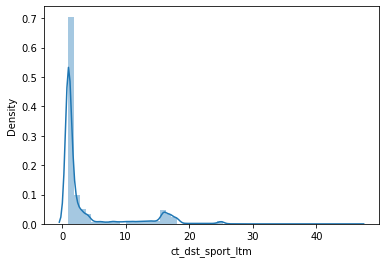

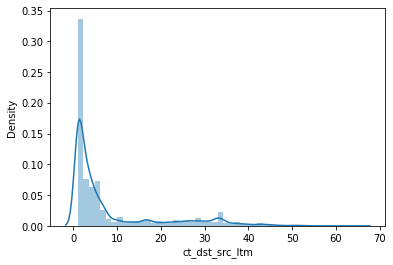

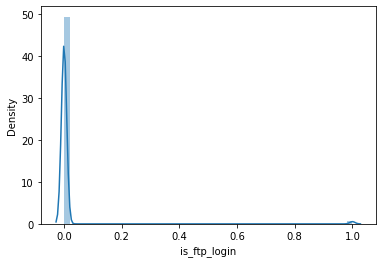

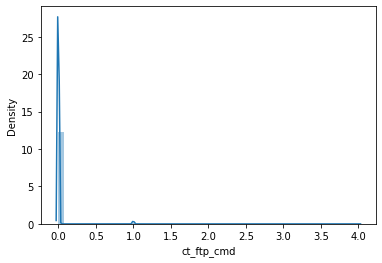

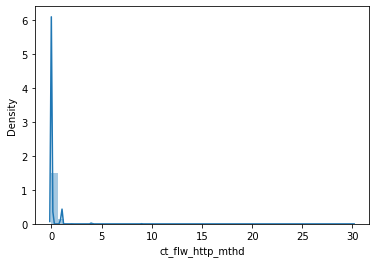

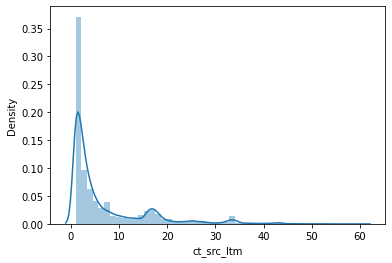

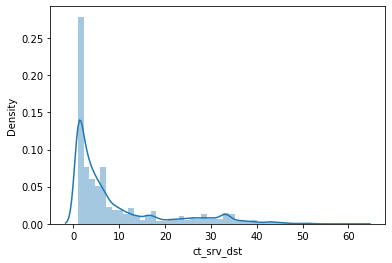

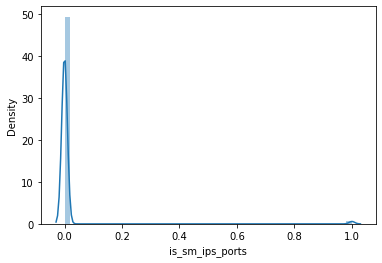

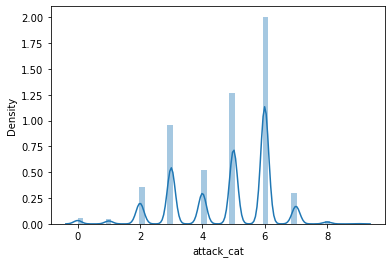

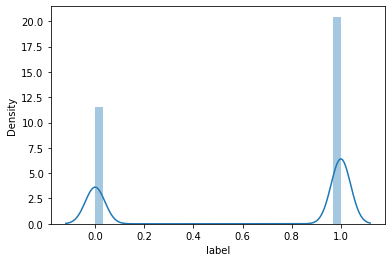

In [ ]:
def plot_GD(dataset):
  num_features = dataset.columns[dataset.dtypes != 'object']
  for i in num_features:
    plt.figure()
    sns.distplot(dataset[i])
plot_GD(dataset)

# 6.**Save the preprocessed file**

**MinMax scaler**

In [ ]:
#APPLY MINMAX SCALER:
columns = X.columns
X_mm = applyMinMax(X)
X_mm
columns
np.savetxt("dataset_minmax.csv", X_mm, delimiter=",", header='dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat')
X_mm = pd.read_csv("dataset_minamx.csv")
df=pd.concat([X_mm,y],axis=1)
df.to_csv('dataset_minmax.csv', index=False)
df.shape

(257673, 44)

**MinMax + Correrlation analysis**

In [ ]:
X_mm = df.drop(columns='label')
col= removeHcorrFeature(0.99,X_mm)
df.drop(df[col], axis=1, inplace=True)
df.shape
df.to_csv('dataset_minmax_corr.csv', index=False)

['sloss', 'dloss', 'dwin']


**PCA**

In [108]:
X_pca=dataset.drop(columns=['label','attack_cat'])    
y_pca=dataset['label']
n_com=0.99
cols =X_pca.columns
#Add min max scaler and return the dataset in pandas dataframe :
print("Apply Standard scaler")
X_pca = applyStandardScaler(X_pca)
X_pca = pd.DataFrame(X_pca, columns =cols)
X_pca = applyPCA(X_pca, n_com)
X_pca.shape
X_pca
#np.savetxt("dataset_pca.csv", X_pca, delimiter=",",header='', encoding=None)
df = pd.DataFrame(X_pca)
df=pd.concat([df,y],axis=1)
df.to_csv('dataset_pca.csv', index=False)

Apply Standard scaler
29
